In [94]:
import nilearn.plotting as plotting
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import os
import second_level_functions as slf
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) #Filterout all the nilearn user warnings

Change name of task here then run

In [95]:
task = 'fear'

Define paths, get images and define negative log10 threshold value

In [96]:
threshold_pval = -np.log10(0.05)
path = os.path.join(config(task), '2ndlevel', 'mixed_model')
save_results = os.path.join(config(task), '2ndlevel')
images = slf.get_images(path)
contrasts = slf.contrast_imgs(images['t_stat'], images['pvals'])

Plotting pvalues

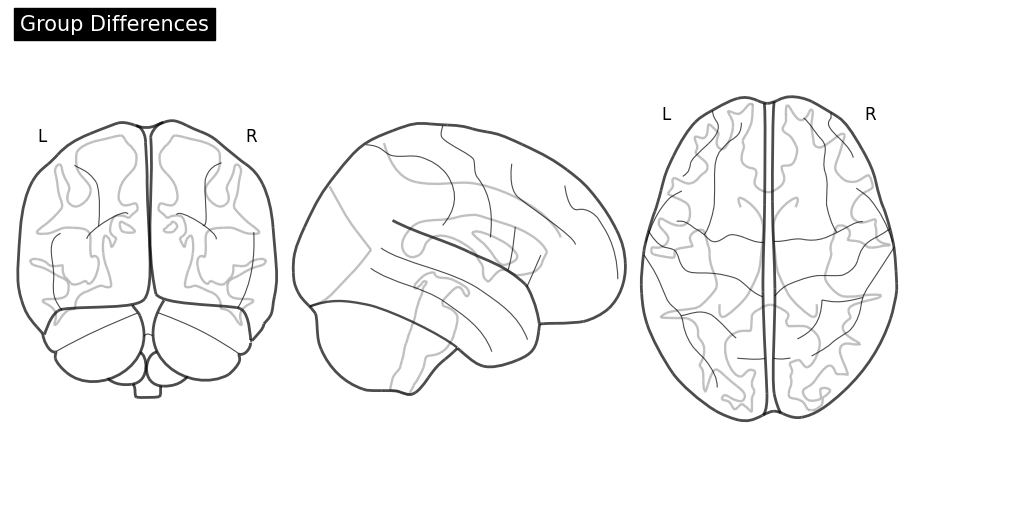

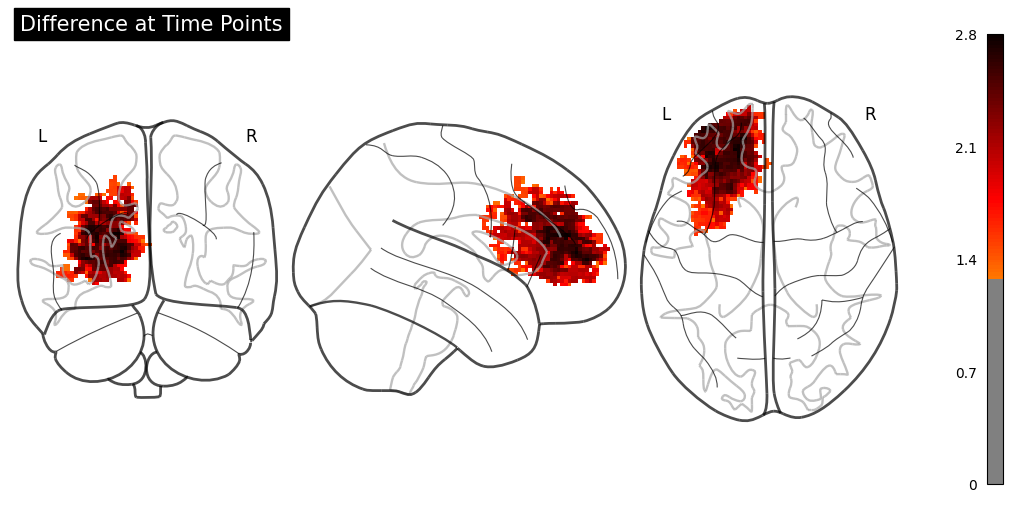

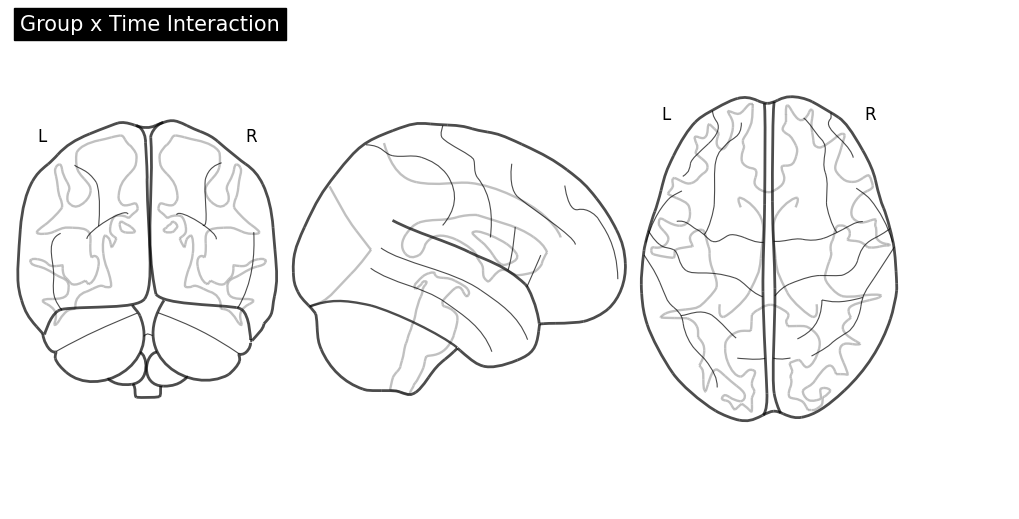

In [97]:
contrasts_list = [contrasts['group'], contrasts['time'], contrasts['interaction']]

for contrast in contrasts_list:
    fig = plt.figure(figsize=(10, 5))
    plotting.plot_glass_brain(contrast['pvals'], colorbar=True, plot_abs=False, 
                              figure=fig, title=contrast['graph_title'], threshold=threshold_pval)


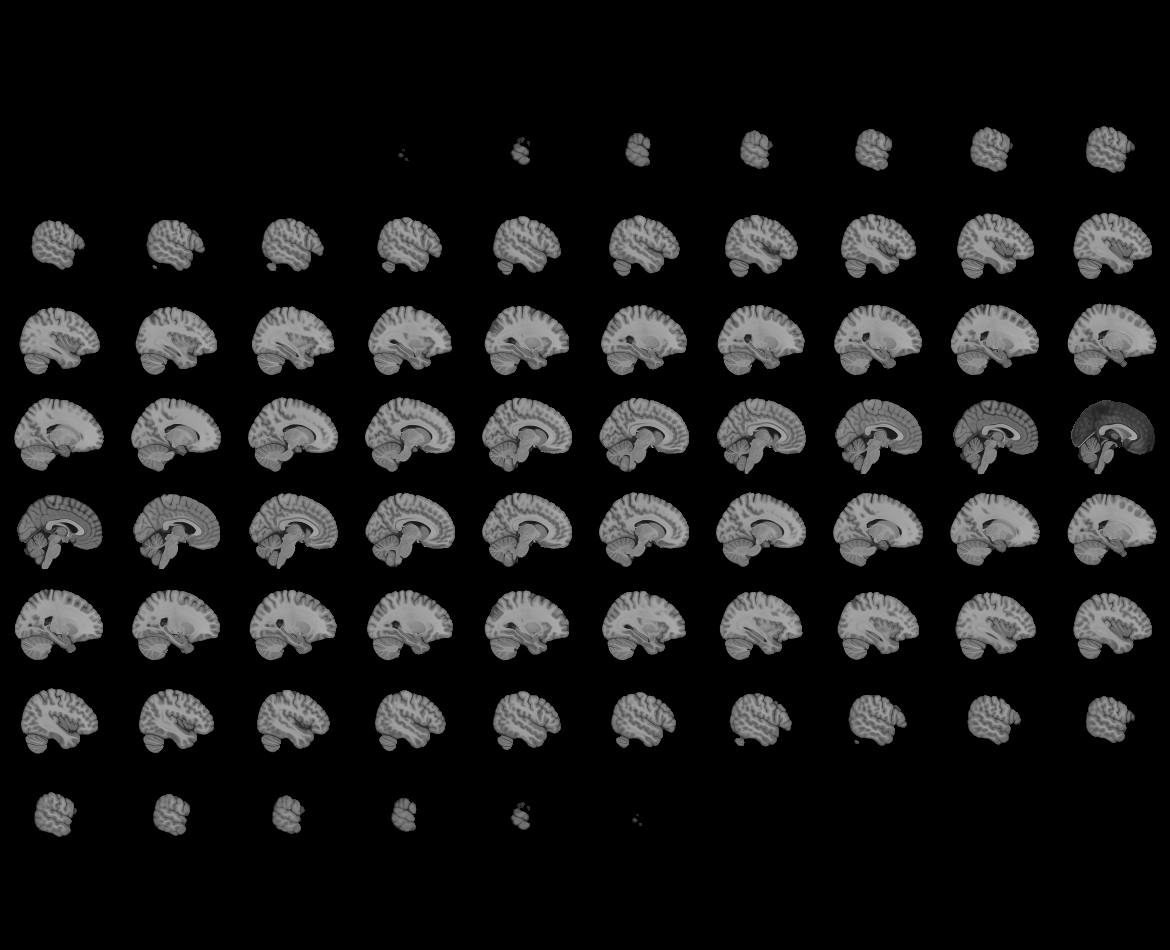
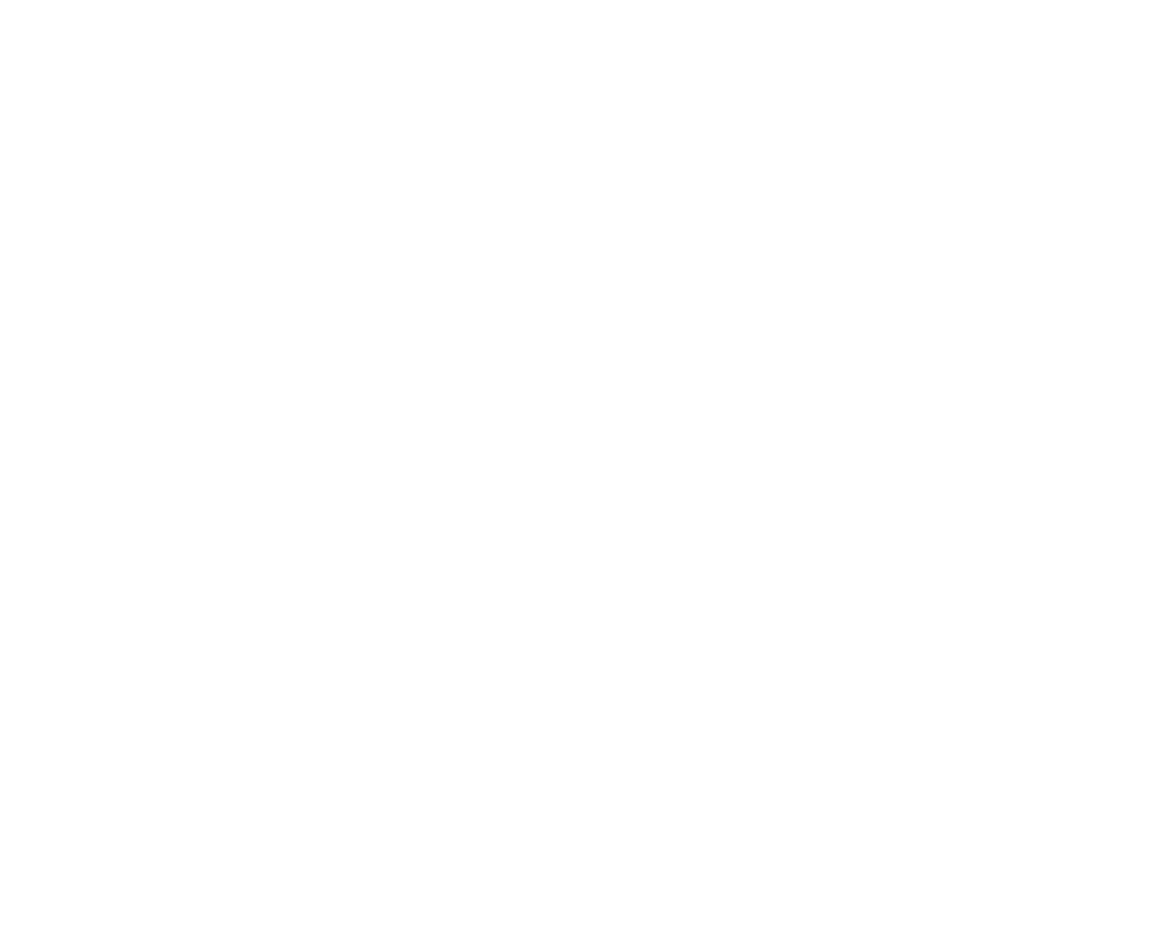

In [98]:
plotting.view_img(contrasts['group']['pvals'], threshold=threshold_pval)


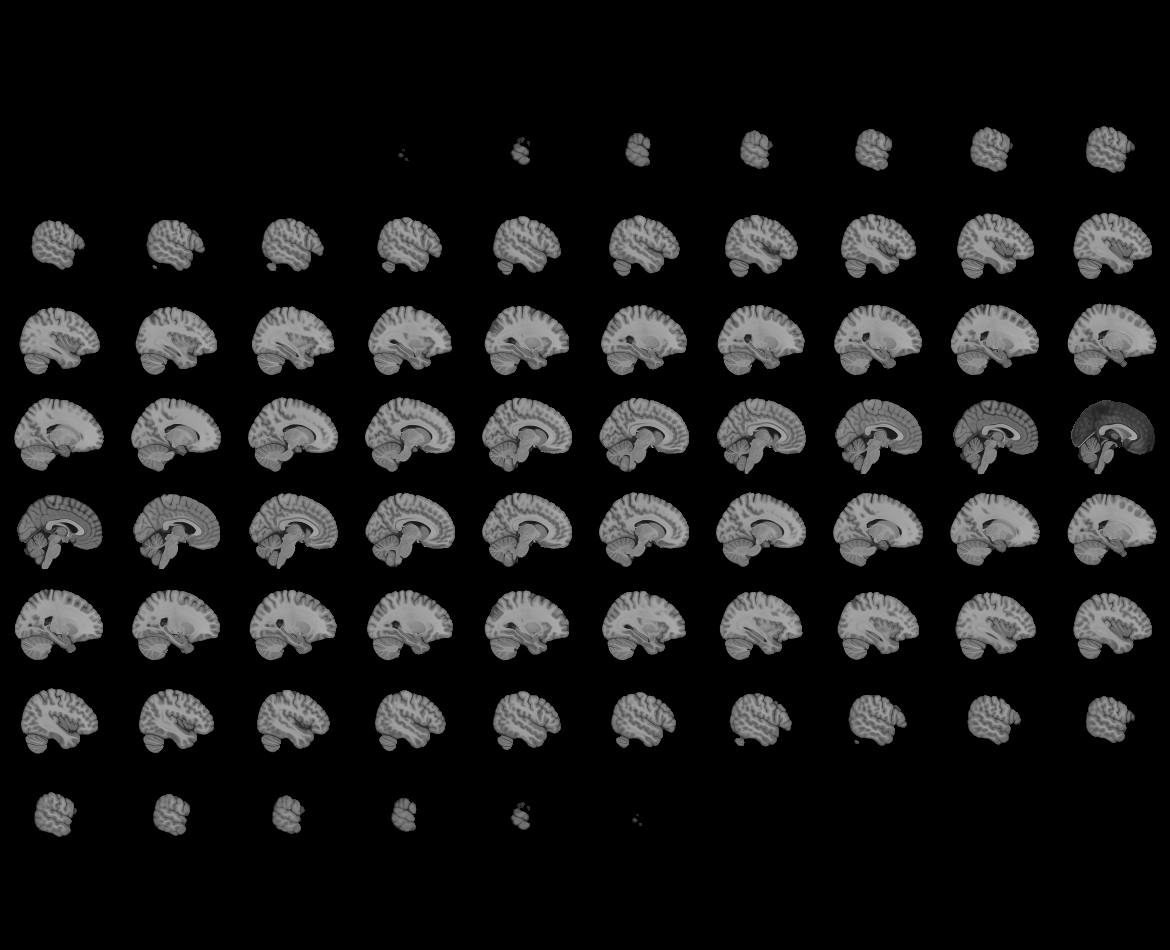
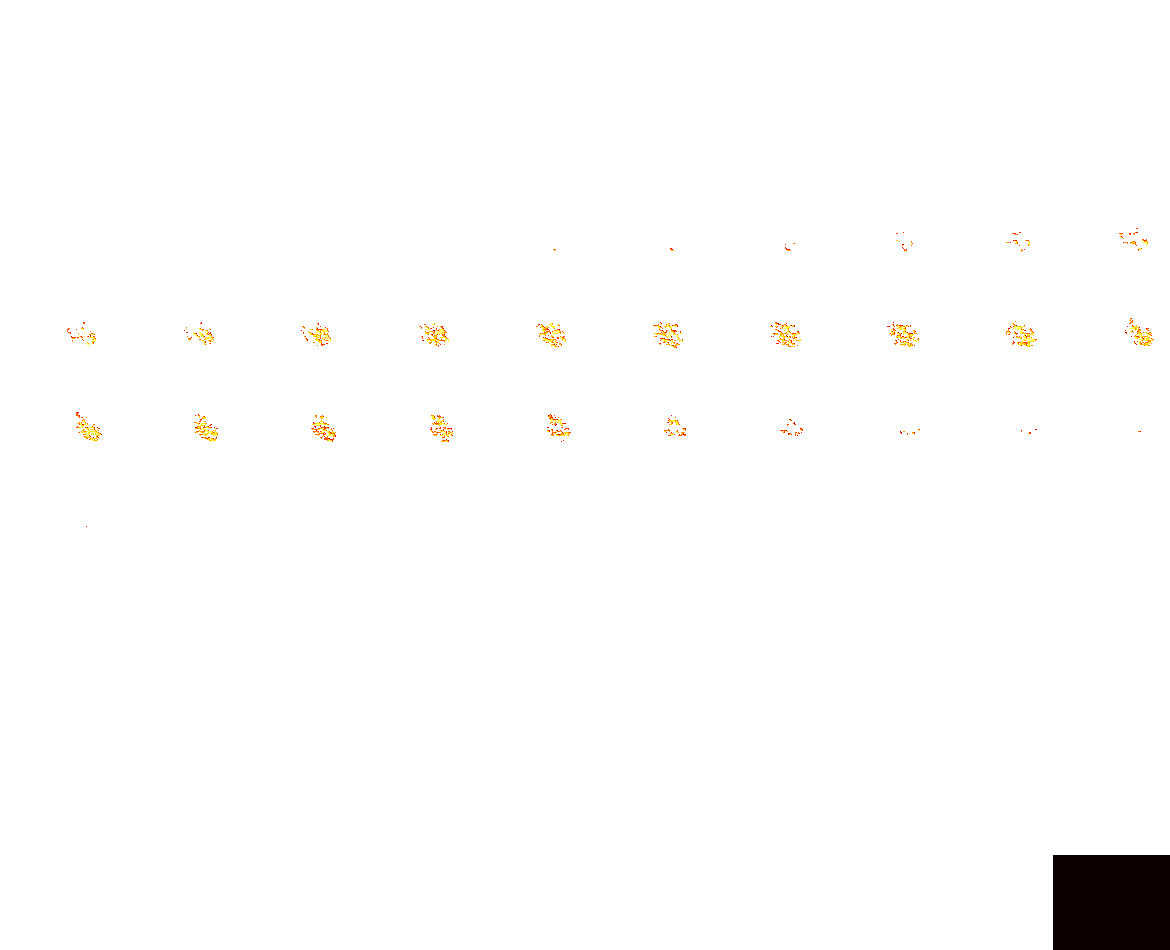

In [99]:
plotting.view_img(contrasts['time']['pvals'], threshold=threshold_pval)


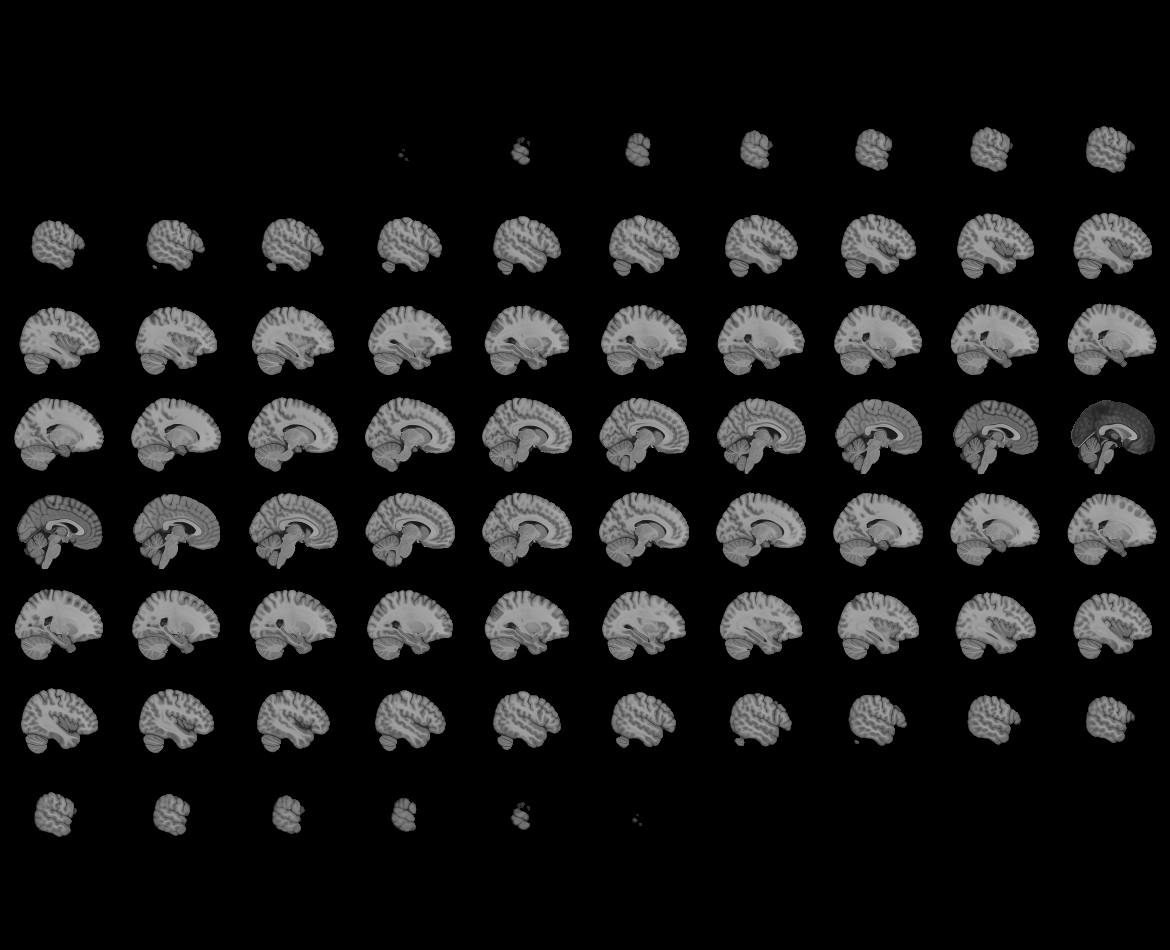
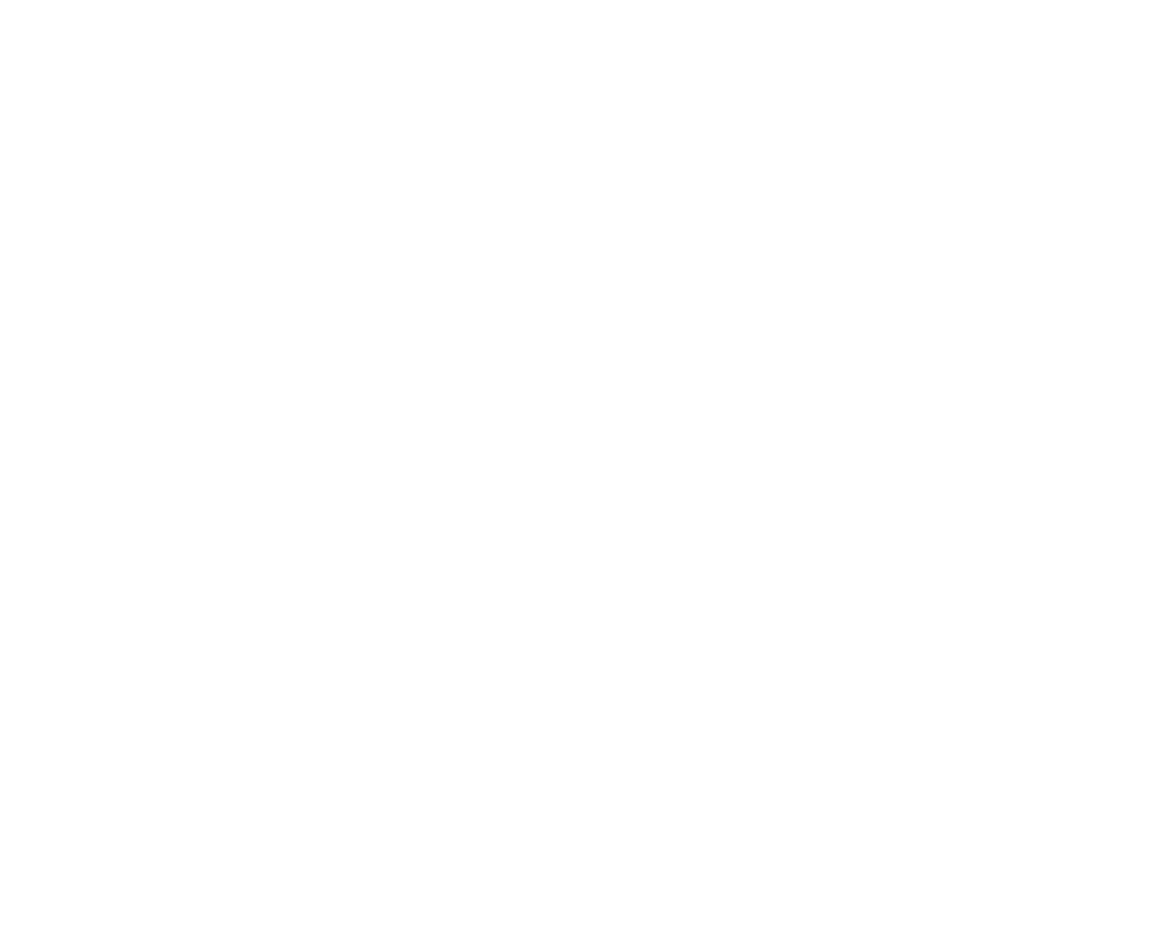

In [100]:
plotting.view_img(contrasts['interaction']['pvals'], threshold=threshold_pval)


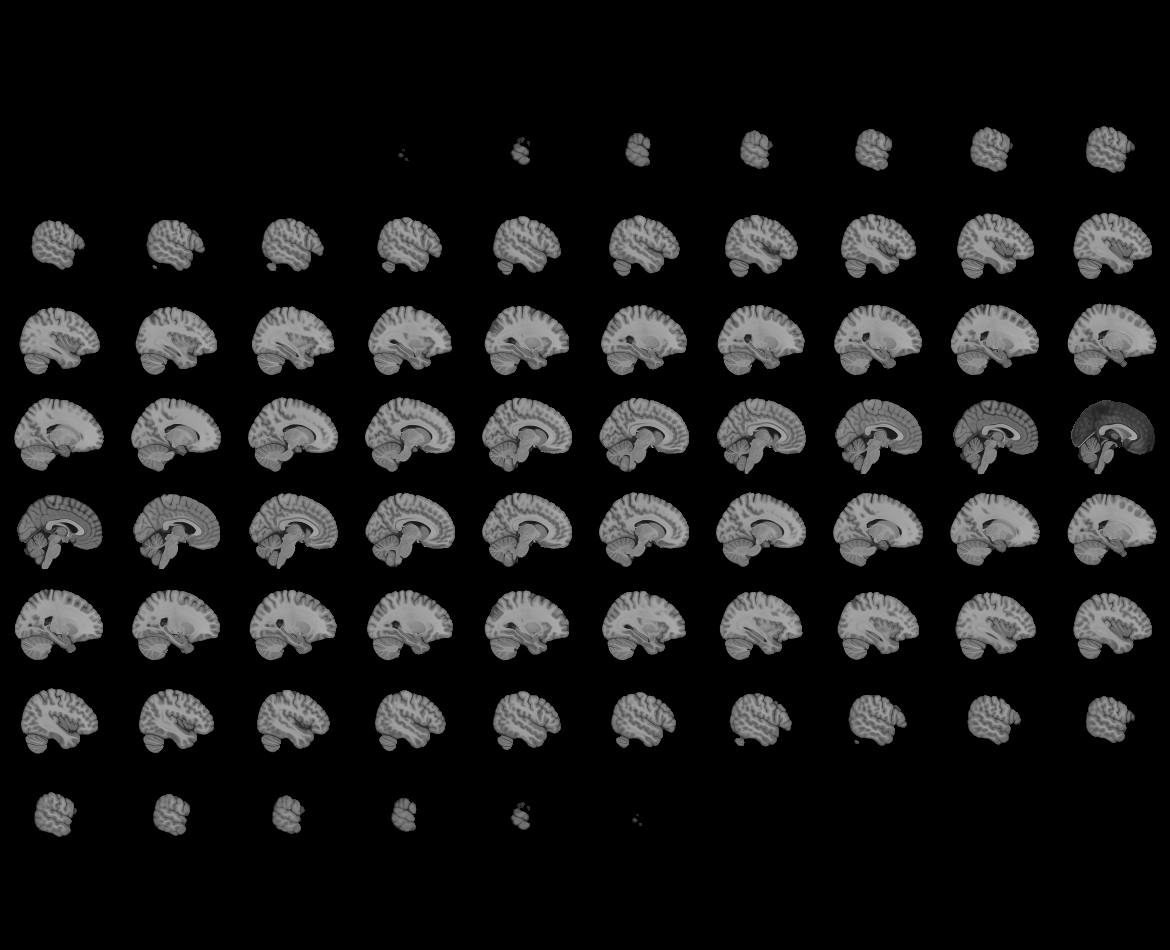
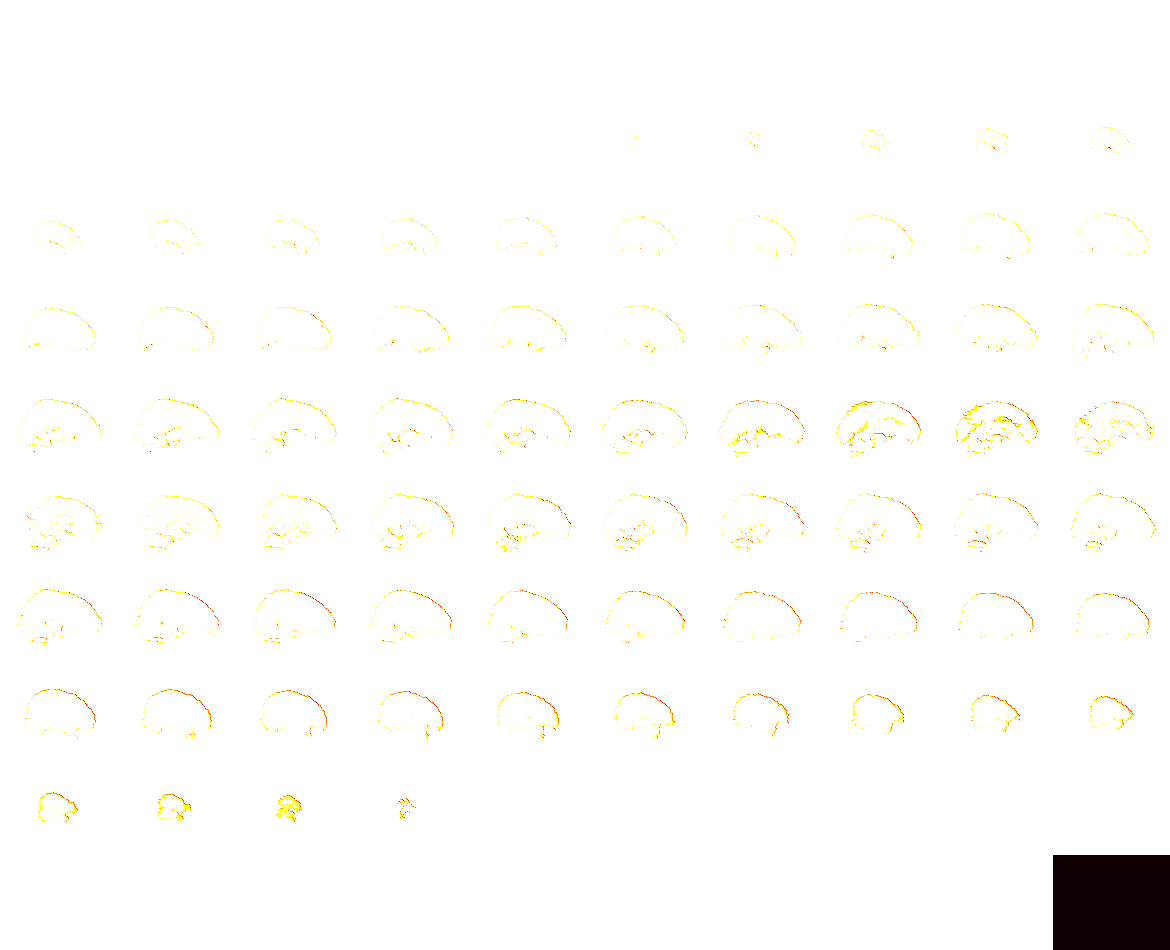

In [101]:
plotting.view_img(images['mask'])

In [102]:
group_clusters = slf.load_cluster_csv(save_results, 'group_clusters.csv')
group_clusters

No Significant Clusters


In [103]:
time_clusters = slf.load_cluster_csv(save_results, 'time_clusters.csv')
time_clusters

,cluster_id,peak_x,peak_y,peak_z,volume_mm,log10p,pval,harvard_oxford,aal,desikan_killiany
0,1,-18.5,43.5,19.5,28080,1.90103,0.012559,40.37% Left_Frontal_Pole; 13.30% no_label; 10....,31.65% no_label; 23.62% Frontal_Sup_2_L; 18.09...,72.74% Left-Cerebral-White-Matter; 9.17% Unkno...


In [104]:
interaction_clusters = slf.load_cluster_csv(save_results, 'interaction_clusters.csv')
interaction_clusters

No Significant Clusters
